# <center><span style='background:yellow'>Améliorez le produit IA de votre start-up (partie 2)</span></center>
# <center><span style='background:yellow'>Exploration des données</span></center>
=========================================================================================================================

### Table of Contents <a class="anchor" id="sommaire"></a>

* [Importation des données](#1)
* [Analyse exploratoire](#2)
    * [Fichier Business](#21)
    * [Fichier Review](#22)

# Importation des données

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import json

#calcul en parallele
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, 
                       nb_workers=4, 
                       verbose=2)

**Liste des fichiers**

In [2]:
path = "C:/Users/modes/OneDrive/Documents/openclassroums/Projet6/yelp_dataset/"
print("On se dispose des fichiers suivants :")
for fichier in os.listdir(path):
    print("-", fichier)

On se dispose des fichiers suivants :
- Dataset_User_Agreement.pdf
- yelp_academic_dataset_business.json
- yelp_academic_dataset_checkin.json
- yelp_academic_dataset_review.json
- yelp_academic_dataset_tip.json
- yelp_academic_dataset_user.json


**Taille des fichiers**

In [3]:
file1 = "yelp_academic_dataset_business.json"
file2 = "yelp_academic_dataset_checkin.json"
file3 = "yelp_academic_dataset_review.json"
file4 = "yelp_academic_dataset_tip.json"
file5 = "yelp_academic_dataset_user.json"

files = [file1, file2, file3, file4, file5]

for i, file in enumerate(files):
    print(f'Taille du fichier \"{file}\" est : {round(os.path.getsize(path+file)/1073741824,2)} Go')

Taille du fichier "yelp_academic_dataset_business.json" est : 0.11 Go
Taille du fichier "yelp_academic_dataset_checkin.json" est : 0.27 Go
Taille du fichier "yelp_academic_dataset_review.json" est : 4.98 Go
Taille du fichier "yelp_academic_dataset_tip.json" est : 0.17 Go
Taille du fichier "yelp_academic_dataset_user.json" est : 3.13 Go


**Importation de données**

In [4]:
#--------------------------------------------------------
#lecture du fuichier "yelp_academic_dataset_business.json"
data_file = open(path+file1, encoding='utf-8')
data_business = []
for line in data_file:
    data_business.append(json.loads(line))
print(f"Le Nombre de lignes du fichier \"{file1}\" est : {len(data_business)}")
data_file.close()

#--------------------------------------------------------
#lecture du fuichier "yelp_academic_dataset_checkin.json" 
data_file = open(path+file2, encoding='utf-8')
data_checkin = []
for line in data_file:
    data_checkin.append(json.loads(line))
print(f"Le Nombre de lignes du fichier \"{file2}\" est : {len(data_checkin)}")
data_file.close()

#--------------------------------------------------------
#lecture du fuichier "yelp_academic_dataset_review.json"
data_file = open(path+file3, encoding='utf-8')
data_reviews = []
for line in data_file:
    data_reviews.append(json.loads(json.dumps(line)))
print(f"Le Nombre de lignes du fichier \"{file3}\" est : {len(data_reviews)}")
data_file.close()

Le Nombre de lignes du fichier "yelp_academic_dataset_business.json" est : 150346
Le Nombre de lignes du fichier "yelp_academic_dataset_checkin.json" est : 131930
Le Nombre de lignes du fichier "yelp_academic_dataset_review.json" est : 6990280


**Exploration du fichier "yelp_academic_dataset_business.json"**

In [5]:
data_business[0]

{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
 'name': 'Abby Rappoport, LAC, CMQ',
 'address': '1616 Chapala St, Ste 2',
 'city': 'Santa Barbara',
 'state': 'CA',
 'postal_code': '93101',
 'latitude': 34.4266787,
 'longitude': -119.7111968,
 'stars': 5.0,
 'review_count': 7,
 'is_open': 0,
 'attributes': {'ByAppointmentOnly': 'True'},
 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'hours': None}

Le premier élément de cette liste est un dictionnaire avec les clès suivantes:

In [6]:
vars_business = list(data_business[0].keys())
print("Liste des clés : ")
for var in vars_business :
    print("-", var)

Liste des clés : 
- business_id
- name
- address
- city
- state
- postal_code
- latitude
- longitude
- stars
- review_count
- is_open
- attributes
- categories
- hours


Pour exploiter nos données, on va transformer notre liste de dictionnaire en dataframe

In [7]:
df_business = pd.DataFrame(data_business)
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


**Exploration du fichier "yelp_academic_dataset_checkin.json"**

In [8]:
data_checkin[0]

{'business_id': '---kPU91CF4Lq2-WlRu9Lw',
 'date': '2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50'}

Le premier élément de cette liste est un dictionnaire avec les clès suivantes:

In [9]:
vars_checkin = list(data_checkin[0].keys())
print("Liste des clés :")
for var in vars_checkin :
    print("-", var)

Liste des clés :
- business_id
- date


Pour exploiter nos données, on va transformer notre liste de dictionnaires en dataframe

In [10]:
df_checkin = pd.DataFrame(data_checkin)
df_checkin.head(5)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


**Exploration du fichier "yelp_academic_dataset_review.json"**

In [11]:
data_reviews[0]

'{"review_id":"KU_O5udG6zpxOg-VcAEodg","user_id":"mh_-eMZ6K5RLWhZyISBhwA","business_id":"XQfwVwDr-v0ZS3_CbbE5Xw","stars":3.0,"useful":0,"funny":0,"cool":0,"text":"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it\'s other locations in NJ and never had a bad experience. \\n\\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.","date":"2018-07-07 22:09:11"}\n'

Le premier élément de cette liste est de type string, le contenu de cet élement est un dictionnaire avec les clès suivantes :

In [12]:
vars_reviews = list(eval(data_reviews[0]).keys())
print("Liste des clés :")
for var in vars_reviews :
    print("-", var)

Liste des clés :
- review_id
- user_id
- business_id
- stars
- useful
- funny
- cool
- text
- date


In [13]:
review_list = []
for obj in tqdm(data_reviews):
    review_list.append(eval(obj))

100%|██████████| 6990280/6990280 [09:57<00:00, 11699.33it/s]


Pour exploiter nos données, on va transformer notre liste de dictionnaires en dataframe

In [14]:
df_reviews = pd.DataFrame(review_list)
df_reviews.to_csv('df_reviews.csv', sep=";")
df_reviews.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


# Analyse exploratoire

## Fichier Business

In [15]:
df_business.head(4)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


In [16]:
print(f"Ce fichier \"{file}\" contient {df_business.shape[0]} entreprises et {df_business.shape[1]} variables.")

Ce fichier "yelp_academic_dataset_user.json" contient 150346 entreprises et 14 variables.


**Type de variables**

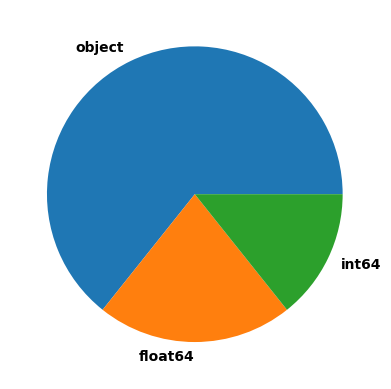

In [17]:
df_business.dtypes.value_counts().plot.pie()
plt.show()

**Variables quantitatives**

In [18]:
print("Liste de variables quantitatives")
for var in df_business.select_dtypes('number').columns:
    print("-", var)

Liste de variables quantitatives
- latitude
- longitude
- stars
- review_count
- is_open


**Variable "is_open"**

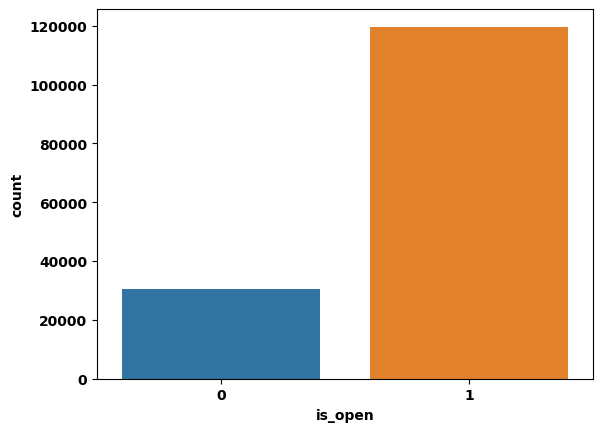

In [19]:
var = 'is_open'
data = df_business
sns.countplot(data=data, x=var)
plt.show()

**Variable "review_count"**

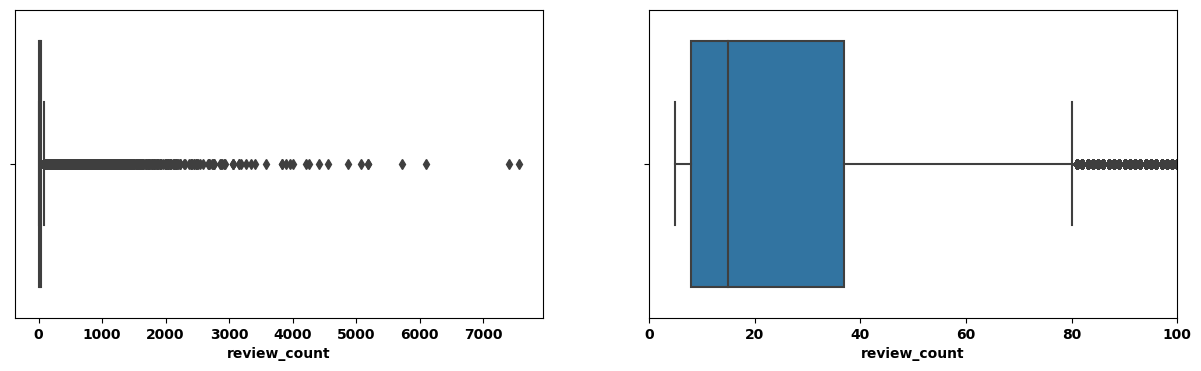

In [20]:
var = 'review_count'
data = df_business

fig = plt.figure(figsize=(15,4))
plt.subplot(121)
sns.boxplot(data=data, x=var)

plt.subplot(122)
sns.boxplot(data=data, x=var)
plt.xlim(0,100)

plt.show()

**Variable "stars"**

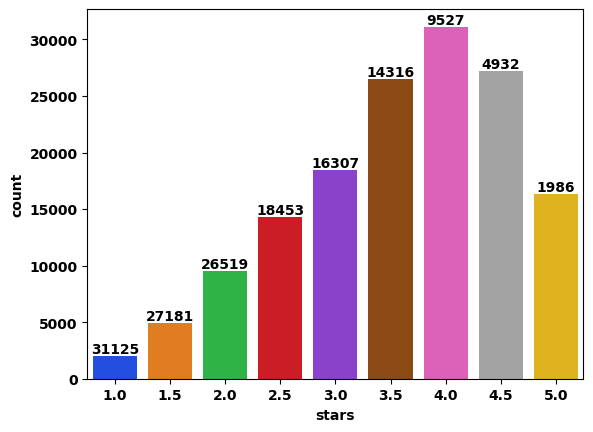

In [21]:
var = 'stars'
data = df_business
ax = sns.countplot(data=data, x=var, palette="bright")

#adding the text labels
rects = ax.patches
labels = data[var].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
plt.show()

**Les variables "latitude" et "longitude"**

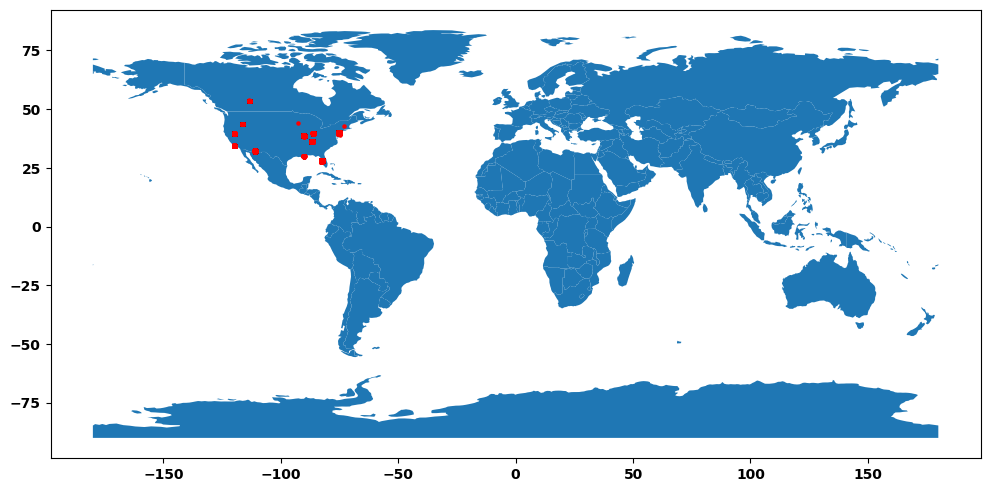

In [22]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

data = df_business.copy()
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = GeoDataFrame(df_business, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='.', color='red', markersize=20);

<a href="#sommaire" rev="footnote">&#8617;</a>

**Variables qualitatives**

In [23]:
print("Liste de variables qualitatives")
for var in df_business.select_dtypes(object).columns:
    print("-", var)

Liste de variables qualitatives
- business_id
- name
- address
- city
- state
- postal_code
- attributes
- categories
- hours


**Variable "state"**

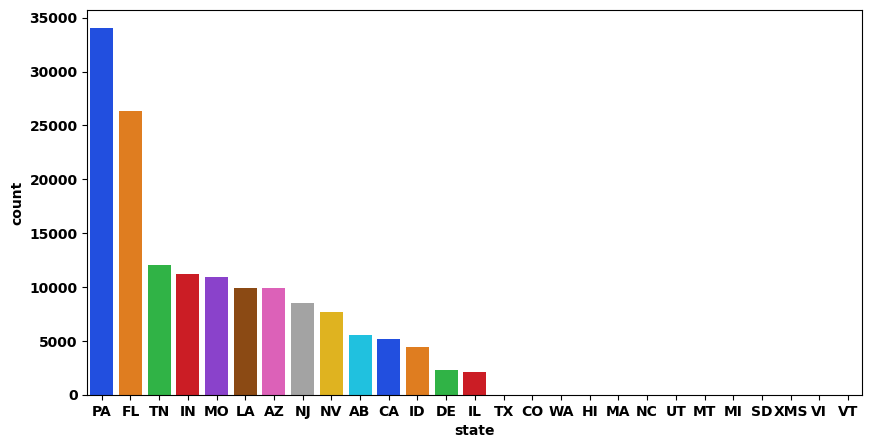

In [24]:
var = 'state'
data = df_business
order = data[var].value_counts().sort_values(ascending=False).index
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(data=data, x=var, order=order, palette='bright')

plt.show()

**Variable "city"**

In [25]:
var = "city"
tmp = df_business[var].value_counts()
print(f'Le nombre des valeurs uniques de la variable \"{var}\" est : {len(tmp)}')

Le nombre des valeurs uniques de la variable "city" est : 1416


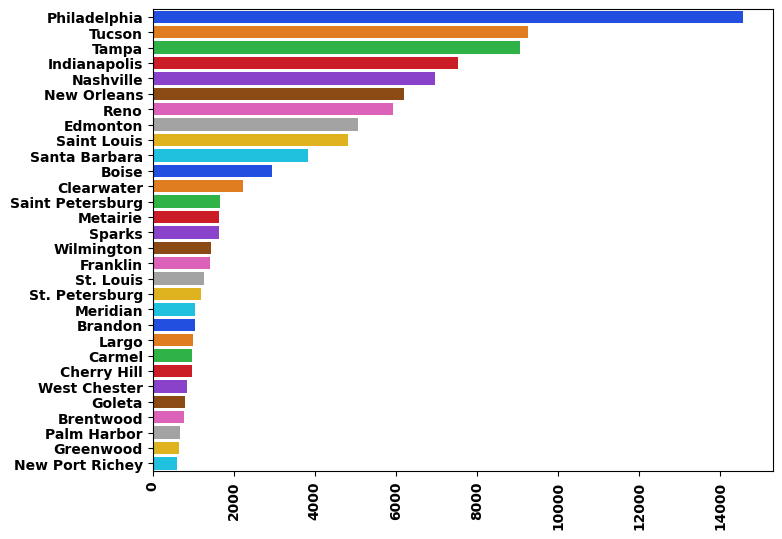

In [26]:
tmp = tmp[:30]
labels = tmp.index[1:]
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(y=tmp.index, x=tmp.values, palette='bright')
plt.xticks(rotation=90)
plt.show()

**Variable "postal_code"**

In [27]:
var = "postal_code"
tmp = df_business[var].value_counts()
print(f'Le nombre des valeurs uniques de la variable \"{var}\" est : {len(tmp)}')

Le nombre des valeurs uniques de la variable "postal_code" est : 3362


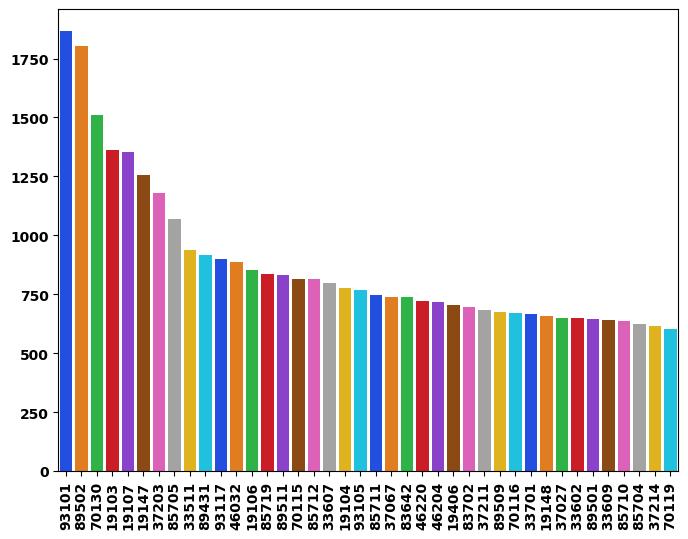

In [28]:
tmp = tmp[:40]
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(x=tmp.index, y=tmp.values, palette='bright')
plt.xticks(rotation=90)
plt.show()

**Variable "name"**

In [29]:
var = "name"
tmp = df_business.name.value_counts()
print(f'Le nombre des valeurs uniques de la variable \"{var}\" est : {len(tmp)}')

Le nombre des valeurs uniques de la variable "name" est : 114117


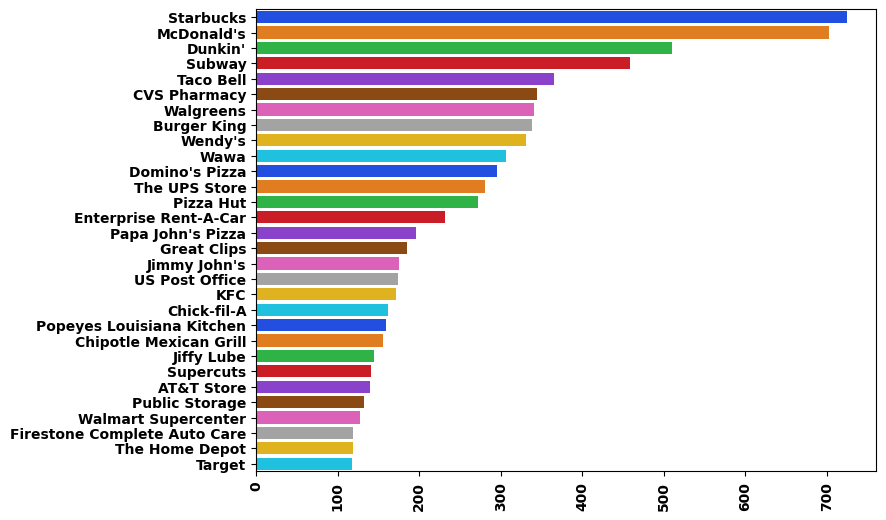

In [30]:
tmp = tmp[:30]
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(y=tmp.index, x=tmp.values, palette='bright')
plt.xticks(rotation=90)
plt.show()

**Variable "categories"**

In [31]:
var = "categories"
tmp = df_business[var].value_counts()
print(f'Le nombre des valeurs uniques de la variable \"{var}\" est : {len(tmp)}')

Le nombre des valeurs uniques de la variable "categories" est : 83160


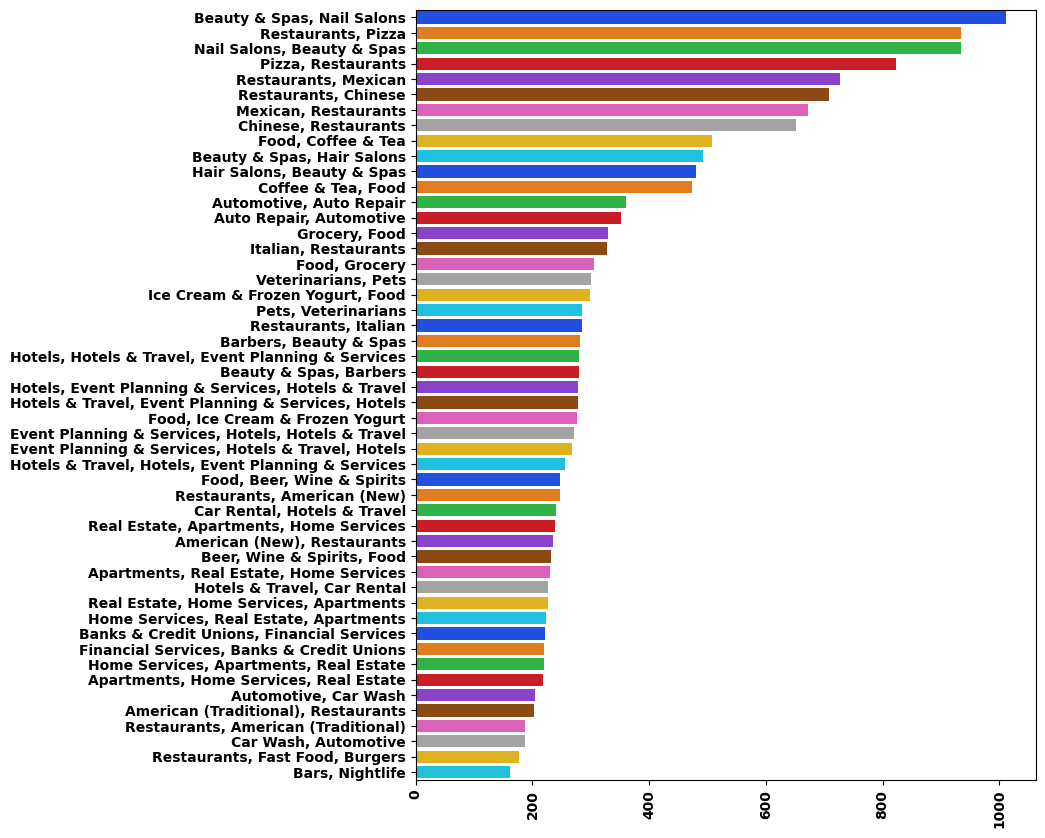

In [32]:
tmp = tmp[:50]
fig = plt.figure(figsize=(8,10))
ax = sns.barplot(y=tmp.index, x=tmp.values, palette='bright')
plt.xticks(rotation=90)
plt.show()

**Variable "hours"**

In [33]:
var = "hours"
df_business[var][0:5]

0                                                 None
1    {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2    {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4    {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
Name: hours, dtype: object

In [34]:
df_business[var][1]

{'Monday': '0:0-0:0',
 'Tuesday': '8:0-18:30',
 'Wednesday': '8:0-18:30',
 'Thursday': '8:0-18:30',
 'Friday': '8:0-18:30',
 'Saturday': '8:0-14:0'}

**Variable "attributes"**

In [35]:
var = "attributes"
df_business[var][0:5]

0                        {'ByAppointmentOnly': 'True'}
1               {'BusinessAcceptsCreditCards': 'True'}
2    {'BikeParking': 'True', 'BusinessAcceptsCredit...
3    {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4    {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
Name: attributes, dtype: object

In [36]:
df_business[var][3]

{'RestaurantsDelivery': 'False',
 'OutdoorSeating': 'False',
 'BusinessAcceptsCreditCards': 'False',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'BikeParking': 'True',
 'RestaurantsPriceRange2': '1',
 'RestaurantsTakeOut': 'True',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'free'",
 'Alcohol': "u'none'",
 'Caters': 'True'}

**Variable "address"**

In [37]:
var = "address"
df_business[var][0:5]

0             1616 Chapala St, Ste 2
1    87 Grasso Plaza Shopping Center
2               5255 E Broadway Blvd
3                        935 Race St
4                      101 Walnut St
Name: address, dtype: object

In [38]:
df_business[var][1]

'87 Grasso Plaza Shopping Center'

## Fichier Review

In [39]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


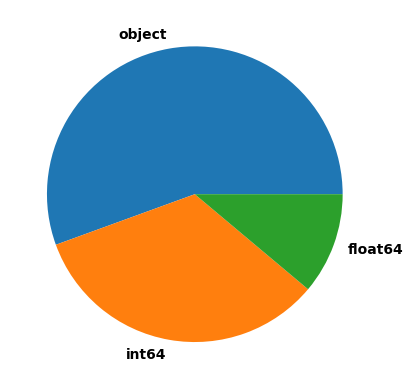

review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object

In [40]:
df_reviews.dtypes.value_counts().plot.pie()
plt.show()

df_reviews.dtypes

**Variables numériques**

In [41]:
print("La liste des variables numériques :")
for col in df_reviews.select_dtypes("number").columns:
    print('-',col)

La liste des variables numériques :
- stars
- useful
- funny
- cool


**Variable "stars"**

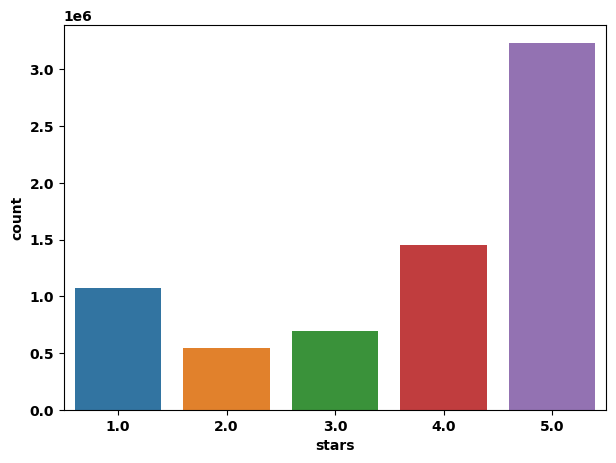

In [42]:
var = "stars"
data = df_reviews
fig = plt.figure(figsize=(7,5))
sns.countplot(data=data, x=var)
plt.show()

**Variables "funny" , "useful" et "cool"**

In [43]:
df_reviews[["funny","useful","cool"]].describe()

,funny,useful,cool
count,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.265596e-01,1.184609e+00,4.986175e-01
std,1.688729e+00,3.253767e+00,2.172460e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00,0.000000e+00
max,7.920000e+02,1.182000e+03,4.040000e+02


In [44]:
for var in ["funny","useful","cool"]:
    display(df_reviews[df_reviews[var]==-1])

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2201840,JcWLycg0Hdsz6LBNAqS37A,04j3r2Psfw_LxX1UXPhnyg,E3Qk7xTznkT0SABL2ltpHA,5.0,-1,-1,-1,The food was so much better than I expected. T...,2017-10-05 02:47:33
4383627,7tlF2NEDiFqMRjKBgTPJ3g,VKK7pPl6DfjL9H5b3n2yCA,qjstXewt23oCZnf86CsHXg,1.0,2,-1,2,The most horrible removal company I have ever ...,2017-02-25 23:40:34


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1933674,plhadSWfXZFKRAhEztb6Dw,0Q4ouqkcwrVE_Im6a6Tomw,SJQePJL1bkeEk-6gp-6eeA,1.0,-1,0,0,This complaint has nothing to do with the qual...,2018-12-23 01:35:31
2008201,gk_9N_c-7oEgzrXVDaR8-g,lEOLrNxD4wknYyERp1FGXw,SJQePJL1bkeEk-6gp-6eeA,1.0,-1,0,0,Only bounce play place in Hendersonville and t...,2016-01-17 00:21:53
2046381,iYS4pfUCUPT_TEmW6BOnrA,1p8Pu1pvAsuNtuZDtn2OkQ,SJQePJL1bkeEk-6gp-6eeA,3.0,-1,0,0,Having been to bouncy places across the countr...,2017-01-18 18:11:15
2201840,JcWLycg0Hdsz6LBNAqS37A,04j3r2Psfw_LxX1UXPhnyg,E3Qk7xTznkT0SABL2ltpHA,5.0,-1,-1,-1,The food was so much better than I expected. T...,2017-10-05 02:47:33


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2201840,JcWLycg0Hdsz6LBNAqS37A,04j3r2Psfw_LxX1UXPhnyg,E3Qk7xTznkT0SABL2ltpHA,5.0,-1,-1,-1,The food was so much better than I expected. T...,2017-10-05 02:47:33


**Remarque**: Il y a des valeurs négatives dans les variables "funny" , "useful" et "cool" mais elles ne sont pas nombreuse

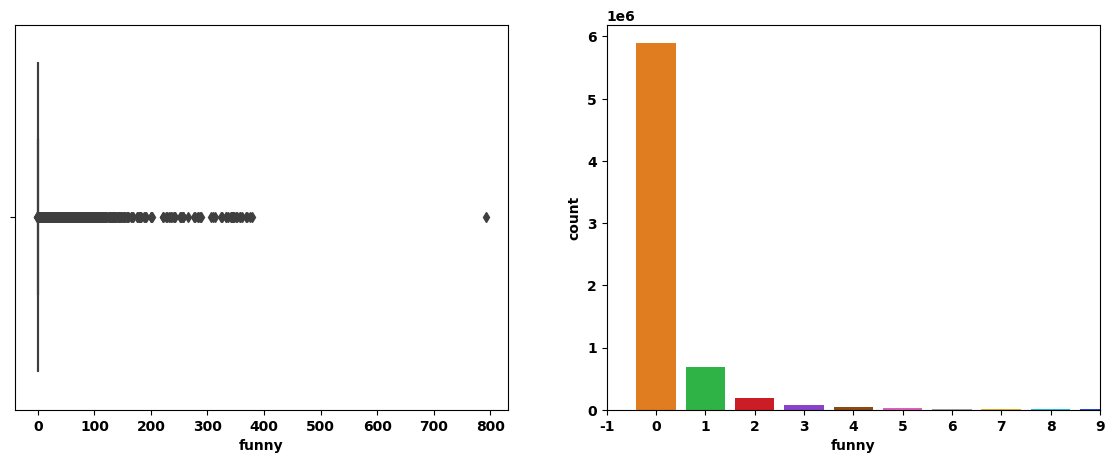

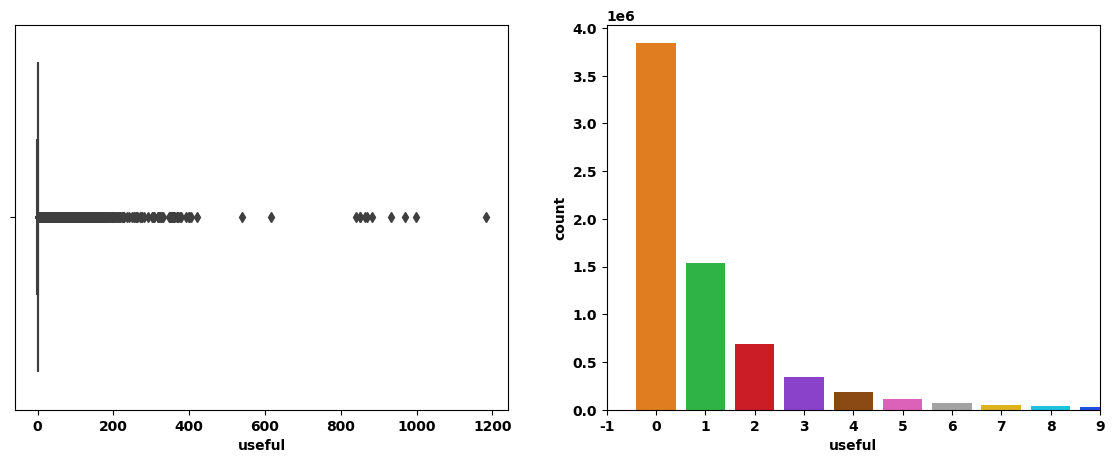

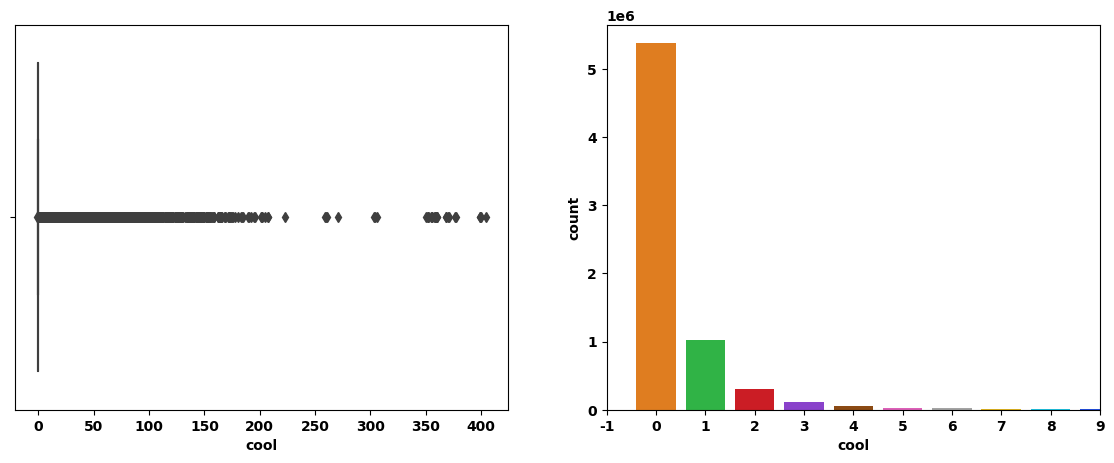

In [45]:
var = "funny"
data = df_reviews
fig = plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(data=data, x=var)
plt.subplot(122)
sns.countplot(data=data, x=var, palette='bright')
plt.xlim(0,10)
plt.show()

var = "useful"
fig = plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(data=data, x=var)
plt.subplot(122)
sns.countplot(data=data, x=var, palette='bright')
plt.xlim(0,10)
plt.show()

var = "cool"
fig = plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(data=data, x=var)
plt.subplot(122)
sns.countplot(data=data, x=var, palette='bright')
plt.xlim(0,10)
plt.show()

**Variables qualitatives**

In [46]:
df_reviews.select_dtypes(object).head()

,review_id,user_id,business_id,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [47]:
df_reviews.select_dtypes(object).describe()

,review_id,user_id,business_id,text,date
count,6990280,6990280,6990280,6990280,6990280
unique,6990280,1987929,150346,6974127,6885665
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,_ab50qdWOk0DdB6XOrBitw,DO NOT PARK HERE!\nthey are too quick to boot ...,2014-04-14 09:19:21
freq,1,3048,7673,18,8


In [48]:
df_reviews["date"] = pd.to_datetime(df_reviews["date"])
df_reviews["date"].describe(datetime_is_numeric=True)

count                          6990280
mean     2017-01-11 11:22:33.441780992
min                2005-02-16 03:23:22
25%      2015-01-25 04:53:50.249999872
50%                2017-06-03 01:26:07
75%      2019-05-23 00:02:46.249999872
max                2022-01-19 19:48:45
Name: date, dtype: object

In [ ]:
#Selection des avis négatifs
bad_reviews = df_reviews[(df_reviews.stars==1) & (df_reviews.text.apply(lambda x: len(x.split()))<15)].copy()
bad_reviews.head()
%store bad_reviews